# casino888

### קבוצה מס' 26

עופרי שגיא,
מרים אביטל,
חני שלומוב,
יפעת נשר

עשינו שימוש בקובץ נתונים מחברה פרטית ששותף עמנו באקסל

https://raw.githubusercontent.com/coymProject/888casinoProject/main/888casinoProject%20.1.csv

# על הדאטה   

הנתונים שלנו נלקחו מחברה בשם

#### 888

אשר עוסקת בפיתוח משחקי הימורים מכמה סוגים בכל העולם למעט בישראל

החברה עובדת עם מספר מפרסמים שונים המשווקים את משחקי החברה באתרים מגוונים ברשת

נתוני החברה בנויים כך שכל שורה בדאטא מציגה את התאריך, שם המפרסם, מספר הפירסומים באותו יום, מספר המשתמשים החדשים שהגיעו באותו היום, מספר ההקלקות על הפרסומת ועוד מידע על גוף הפרסומות 
(איזה משחק היא משווקת, שפה, גודל וכו')

ניתחנו את הדאטה במטרה לייעל את השיווק העתידי של החברה. בסוף התהליך הגענו למסקנות שיפור משמעותיות, את התהליך והמסקנות נציג כעת   


#####

In [1]:
from IPython.display import display, HTML, Image

image_url='https://raw.github.com/coymProject/888casinoProject/main/WhatsApp%20Image%202023-06-15%20at%2016.10.00.jpeg?raw=true'
image_width= 800
image_height= 600
centered_image_html= f'<div style="display: flex; justify-content: center;"><img src="{image_url}" width="{image_width}" height={image_height}"></div>'
display(HTML(centered_image_html))


##### ייבוא הספריות 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import matplotlib.ticker as ticker
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### ניקיון וסינון הדאטה


In [3]:
casino888_df= pd.read_csv('https://raw.githubusercontent.com/coymProject/888casinoProject/main/888casinoProject%20.1.csv')
Impressions = 'NoOfImpressions'
casino888_df.loc[casino888_df[Impressions] == 0, Impressions] = 1
casino888_df.to_csv('updated_file.csv', index=False)
zeros_count = (casino888_df == 0).sum(axis=1)
original_rows = casino888_df.shape[0]
zeros_count = (casino888_df == 0).sum(axis=1)
casino888_df = casino888_df[zeros_count < 5]
numeric_columns = casino888_df.select_dtypes(include=np.number).columns
casino888_df = casino888_df[~(casino888_df[numeric_columns] < 0).any(axis=1)]
dropped_rows = original_rows - casino888_df.shape[0]
casino888_df.to_csv('modified_file.csv', index=False)

print(f"Number of dropped rows: {dropped_rows}")



Number of dropped rows: 21


# פערים בהצלחת הפירסום במדינות השונות 

C:\Users\יפעת\AppData\Local\Temp\ipykernel_11116\1148779023.py:1: FutureWarning: ['MM_BrandName', 'MM_Size_Name', 'MM_DestinationURL', 'MM_Promotion_Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_avg_Language=casino888_df.groupby(['Language_Desc','BannerName']).agg(['mean'])


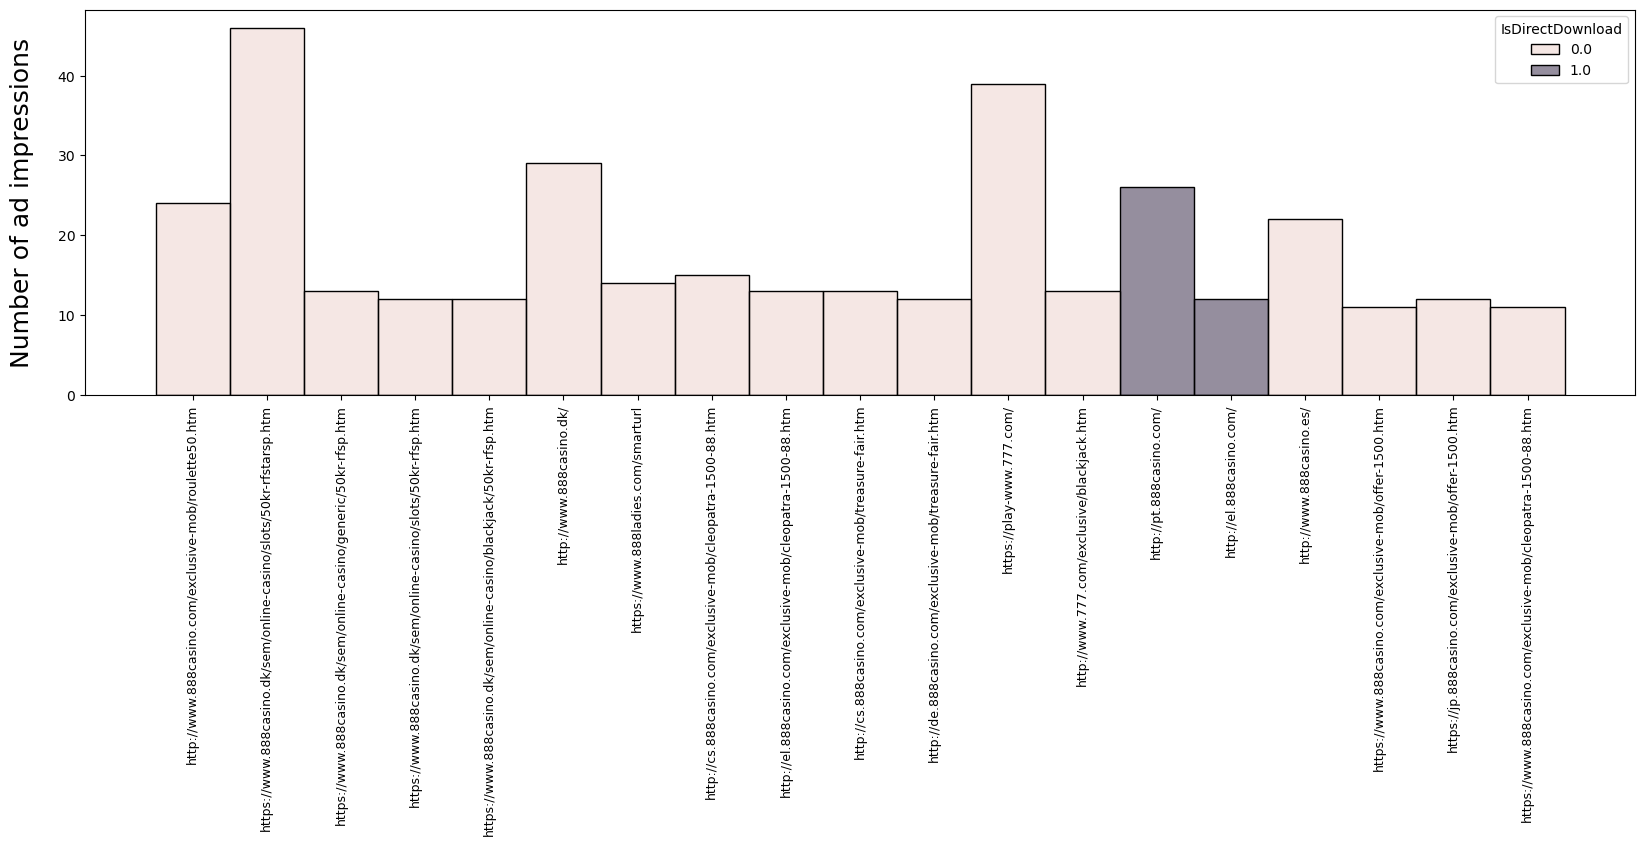

In [4]:
df_avg_Language=casino888_df.groupby(['Language_Desc','BannerName']).agg(['mean'])
list_a_columns=[]
for i in df_avg_Language.columns:
    i=i[0]
    list_a_columns.append(i)
    
df_avg_Language.columns=list_a_columns
df_avg_Language=df_avg_Language.reset_index()
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
g = sns.histplot(casino888_df,x='MM_DestinationURL',hue='IsDirectDownload')
plt.ylabel("Number of ad impressions",fontsize=18)
plt.xlabel("",fontsize=15)
plt.xticks(rotation=90,fontsize=9)
g.yaxis.labelpad = 17
plt.show()

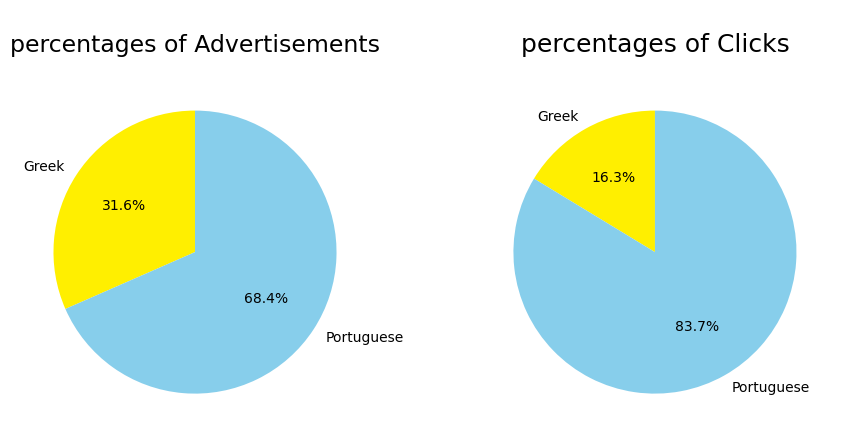

In [5]:
data_is_downled = casino888_df[casino888_df['IsDirectDownload'] == 1.0]
data_is_not_downled = casino888_df[casino888_df['IsDirectDownload'] != 1.0]
data_is_downled_binary = pd.get_dummies(data_is_downled)
lang = pd.DataFrame({
    "index": ["Greek", "Portuguese"],
    "num_of_adv": [
        data_is_downled_binary["Language_Desc_Greek"].sum(),
        data_is_downled_binary["Language_Desc_Portuguese"].sum()
    ]
})

data_is_downled_lan_clicks = data_is_downled.groupby("Language_Desc")["NoofClicks"].sum()
data_is_downled_lan_clicks = data_is_downled_lan_clicks.reset_index()
fig, ax = plt.subplots(1, 2, figsize=(10.5, 5))

advertising_pie = ax[0].pie(lang['num_of_adv'], labels=lang['index'], colors=["#FFEF00", "#87CEEB"],
                            autopct='%1.1f%%', startangle=90)
ax[0].set_title("percentages of Advertisements",pad=17,fontsize=17)


clicks_pie = ax[1].pie(data_is_downled_lan_clicks['NoofClicks'], labels=data_is_downled_lan_clicks['Language_Desc'],
                       colors=["#FFEF00", "#87CEEB"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("percentages of Clicks",pad=17,fontsize=18)
fig.suptitle("   ",fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()


:היחסים בין יוון לפורטוגל

גרף שמאלי- יחס הפירסומים

גרף ימני- יחס ההקלקות


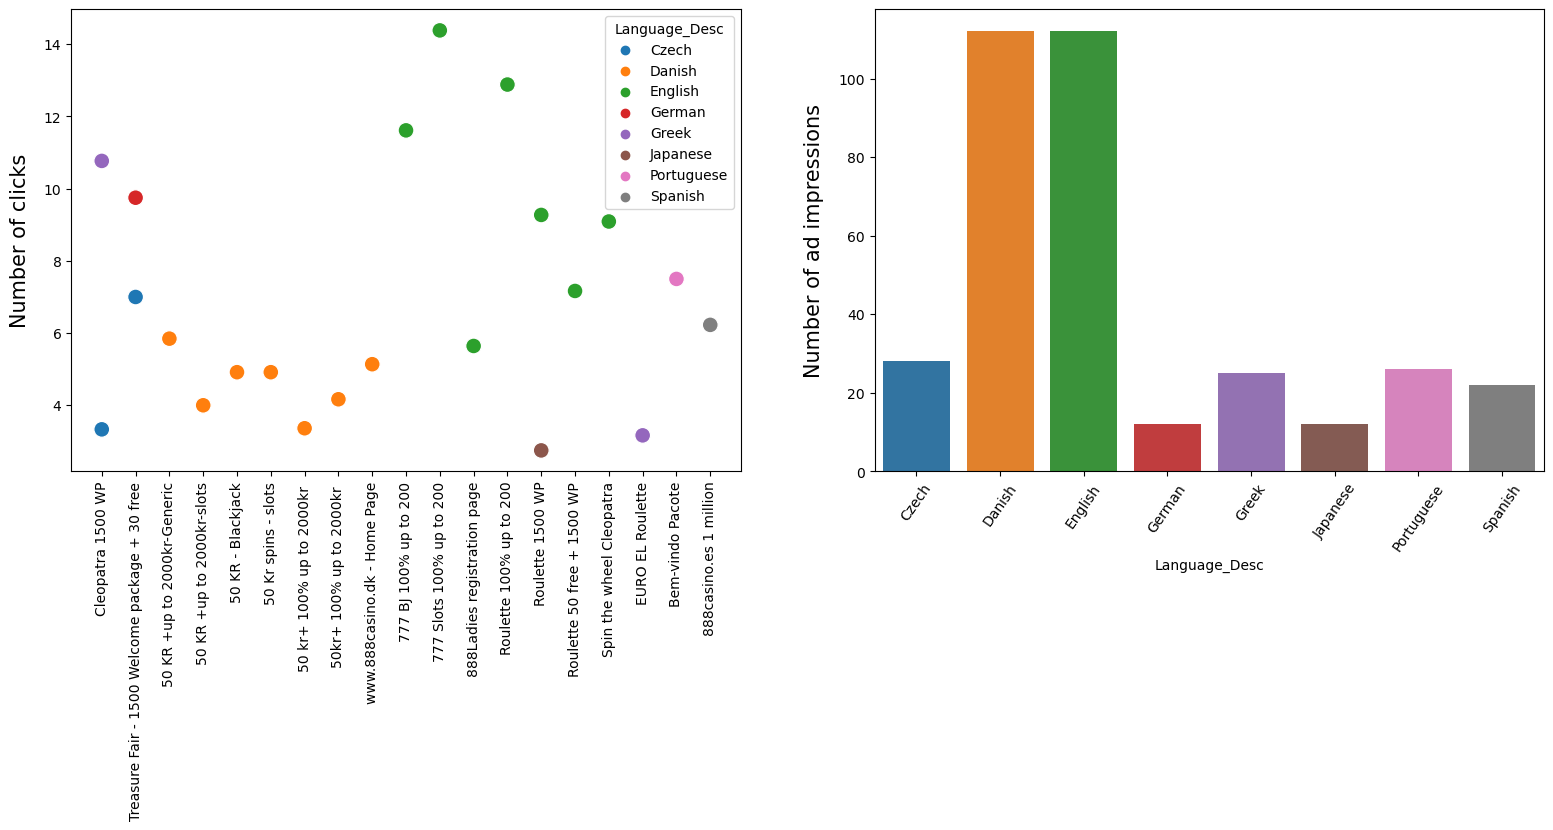

In [6]:
casino888_df["sum"]=1
data_sum_Language=casino888_df.groupby(['Language_Desc']).sum()
data_sum_Language=data_sum_Language.reset_index()

fig, ax = plt.subplots(figsize=(19, 6), ncols=2)
plt.subplots_adjust(wspace=0.2)
sns.scatterplot(data=df_avg_Language, x='BannerName', y='NoofClicks', hue='Language_Desc',s=130, ax=ax[0])
sns.barplot(x=data_sum_Language['Language_Desc'],y="sum" ,data=data_sum_Language, ax=ax[1])

ax[0].tick_params(axis='x', rotation=90) 
ax[1].tick_params(axis='x', rotation=55)  
ax[0].set_xlabel('', fontsize=10)
ax[0].set_ylabel('Number of clicks', fontsize=15)
ax[1].set_ylabel('Number of ad impressions', fontsize=15)
ax[0].yaxis.labelpad = 10
ax[1].yaxis.labelpad = 10
plt.show()

גרף ימני- כמות הפירסומים בכל אחת מהשפות (המדינות)

גרף שמאלי- ממוצע ההקלקות בכל משחק בכל אחת מהשפות (המדינות)

מסקנה- בכל הפרסומות בשפה הדנית, ממוצע ההקלקות נמוך ובהתחשב בכך שהיא אחת משתי השפות המובילות בכמות הפרסומות, חלק נכבד מן ההשקעה על הפרסומות אינה מתגמלת

#  גודל מודעות אופטימלי

In [7]:
sizes=["236x60","468x60","250x250","728x90","120x600","236x60","468x60","300x600","720x300"]

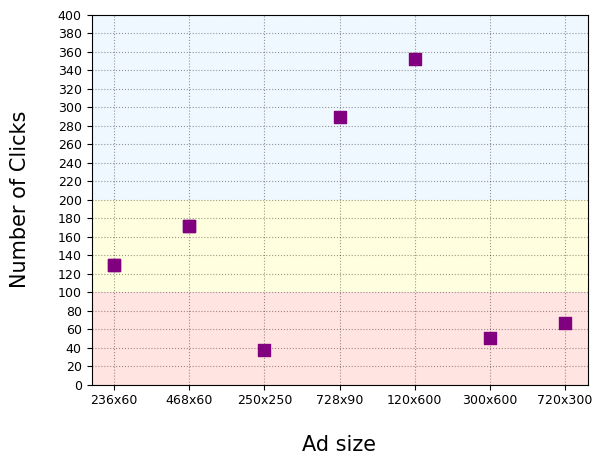

In [8]:
df_median_NoOfImpressions=casino888_df.groupby(["MM_Size_Name"]).agg(['sum'])

list_a_columns=[]
for i in df_median_NoOfImpressions.columns:
    i=i[0]
    list_a_columns.append(i)

df_median_NoOfImpressions.columns=list_a_columns
df_median_NoOfImpressions=df_median_NoOfImpressions.reset_index()
df_median_NoOfImpressions
a=["250x250","300x600","720x300"]
b=["236x60","468x60","300x600"]
c=["728x90","120x600"]
sections=[a,b,c]
new= df_median_NoOfImpressions.set_index(df_median_NoOfImpressions["MM_Size_Name"]).loc[sizes].plot(kind="scatter",x="MM_Size_Name",y="NoofClicks",s=70,color="purple",zorder=10,marker='s')
y_spacing = 20 
new.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))
new.set_ylabel('Number of Clicks', fontsize=15)
new.set_xlabel('Ad size', fontsize=15)
new.set_ylim(0, 400)
new.tick_params(axis='both', which='major', labelsize=9)
new.axhspan(0, 100, facecolor='0.5')
new.axhspan(100, 200, facecolor='0.5')
new.axhspan(200,400, facecolor='0.56')
new.axhspan(0, 100, facecolor='#FFE4E1')
new.axhspan(100, 200, facecolor='#FFFFE0')
new.axhspan(200,400, facecolor="#F0F8FF")
new.xaxis.labelpad = 20
new.yaxis.labelpad = 20
new.grid(True, alpha=0.4,color='black',linestyle='dotted')

כל ריבוע סגול מייצג את מספר ההקלקות לפי גודל המודעה. הריבועים ממופים לפי שלושה אזורים בהתאם לכמות ההקלקות

מסקנה- ישנם שני גדלי מודעות אשר הניבו את מספר הההקלקות הגבוה ביותר 

#  אסטרטגיית הנחשפים לפירסום 

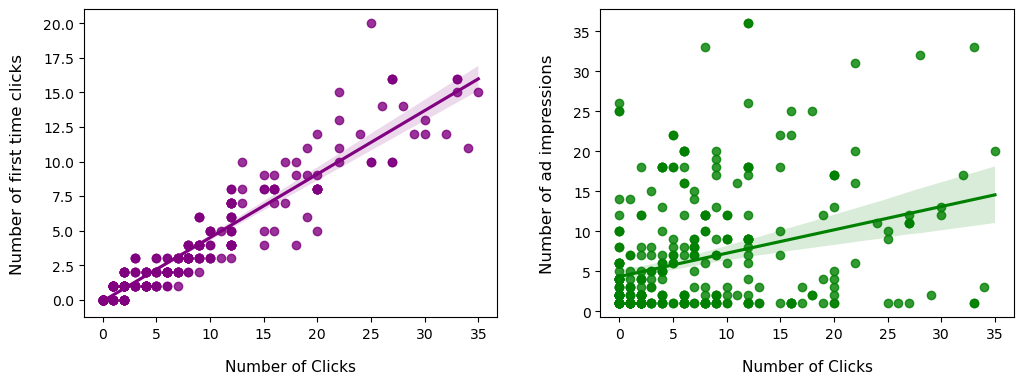

In [9]:
fig, ax= plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace =0.25)
sns.regplot(x=casino888_df["NoofClicks"],y=casino888_df["Unique_CLI_Count"], color='purple',ax = ax[0])
sns.regplot(x=casino888_df["NoofClicks"],y=casino888_df["NoOfImpressions"], color='green',ax = ax[1])

ax[0].set_xlabel('Number of Clicks', fontsize=11)
ax[1].set_xlabel('Number of Clicks', fontsize=11)
ax[0].set_ylabel('Number of first time clicks', fontsize=12)
ax[1].set_ylabel('Number of ad impressions', fontsize=12)
ax[1].xaxis.labelpad = 13
ax[1].yaxis.labelpad = 13
ax[0].yaxis.labelpad = 13
ax[0].xaxis.labelpad = 13

plt.show()

גרף ימני- קשר חלש בין מספר ההקלקות למספר הפירסומים

גרף שמאלי-  קשר חזק בין כמות ההקלקות לבין כמות המשתמשים חדשים

מסקנה- פרסום חוזר לאותם משתמשים אינו יעיל, עם זאת אנו רואים שלסך כמות ההקלקות יש קשר ישיר לכמות המשתמשים החדשים

# מסקנות והמלצות

### ייעול באמצעות התאמות בשפות הפרסום 

אנו ממליצות לצמצם את הפרסום בשפה הדנית, ולכוון את המשאבים לפרסום בשפות המשוייכות למדינות בהן כמות ההקלקות בממוצע גבוהה יותר

'למשל גרמניה, יוון (במשחקי האונליין) וכו

### שימוש בגדלים האופטימליים לפרסום

מצאנו כי כדאי לצמצם משמעותית את הפרסום בגדלים אשר כמות הכניסות לאתר דרכן נמוכה ונמצאים באזור האדום

בנוסף נמליץ להרחיב ולהגביר  את הפרסום בגדלים שהוכחו כמצליחים למשוך גולשים ( גדלים הנמצאים באזור התכלת )

###   מיקוד אסטרטגיית הפרסום במשתמשים חדשים 

לא משתלם להשקיע ב"פרסומות חוזרות" למשתמשים קיימים, אלא כדאי למקד את ההשקעה בפריסה רחבה יותר של הפרסומות ברחבי הרשת על מנת להגיע לגולשים נוספים 

רוב השימוש מגיע ממשתמשים חדשים, ולכן יש להפנות לפלח גולשים זה את משאבי הפרסום

:)מהמרים שנהניתם